In [155]:
library(tidyverse)
library(repr)
library(tidymodels)

In [157]:
heart_disease <- read_csv(file = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))
# heart_disease_hungarian <- read_csv(file = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", col_names = c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))
# heart_disease_switzerland <- read_csv(file = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", col_names = c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))
# heart_disease_va <- read_csv(file = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", col_names = c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [72]:
# heart_disease <- rbind(heart_disease_cleveland, heart_disease_hungarian, heart_disease_switzerland, heart_disease_va) %>% 
#     mutate(cp = as_factor(cp), sex = as_factor(sex), fbs = as_factor(fbs), thal = as_factor(thal), num = as_factor(num))

In [161]:
heart_disease %>% 
    select(trestbps, chol, num)

trestbps,chol,num
<dbl>,<dbl>,<dbl>
145,233,0
160,286,2
120,229,1
130,250,0
130,204,0
120,236,0
140,268,3
120,354,0
130,254,2


num,n
<dbl>,<int>
0,122
1,42
2,27
3,26
4,9


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



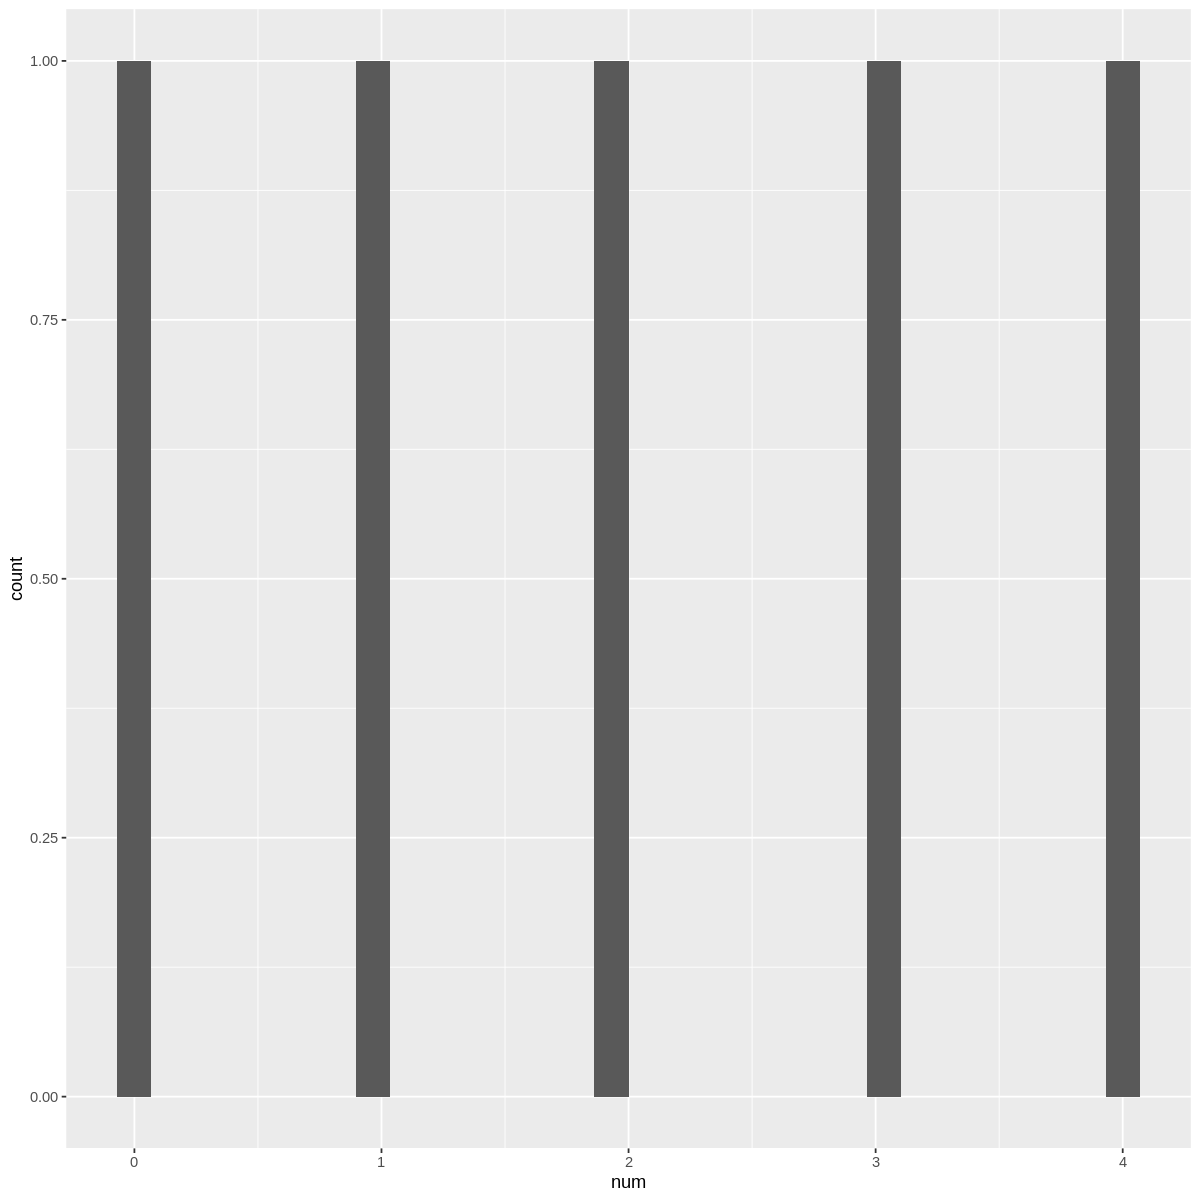

In [168]:
# resting bloood pressure and chol 
heart_split <- initial_split(heart, prop = 0.75, strata = num)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

heart_train_summary <- heart_train %>% 
    group_by(num) %>% 
    summarize(n = n())

heart_train_summary

heart_train_summary_plot <- ggplot(heart_train_summary, aes(x = num)) +
    geom_bar(stat="bin", position="stack")

heart_train_summary_plot
# options(repr.plot.width = 10, repr.plot.height = 10)
# heart <- heart_disease %>% 
#     select(trestbps, chol, num) %>% 
#     filter(trestbps != "?", chol != "?")


# knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
#       set_engine("kknn") %>%
#       set_mode("classification")

# knn_recipe <- recipe(num ~ ., data = heart_train) %>% 
#     step_scale(all_predictors()) %>% 
#     step_center(all_predictors())

# heart_work <- workflow() %>% 
#     add_recipe(knn_recipe) %>% 
#     add_model(knn_spec) 

# # heart_fit <- heart_work %>% 
# #     fit(data = heart_train)

# # new_obs <- tibble(Symmetry = 1,Radius = 0)
# # class_prediction <- predict(heart_fit, heart_test)



# heart_plot <- ggplot(heart, aes(x = chol, y = trestbps, color = num)) + 
#     geom_point() 
# # + 
#     # geom_line()

# heart_plot